In [1]:
import os
import sys
import pprint

import pandas as pd
import numpy as np

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#
# Grab data in pyspark dataframe
#

# I made a 'data' dir (not checked in) at the same level as this 'notebooks' dir for exploratory data
stock_input_path = "../data/VOO_max_stock_metrics.parquet"

df = pd.read_parquet(stock_input_path)

In [4]:
#
# Quick view, stats, etc
#

#df
df.describe()
#df.dtypes
#df.count()

,dividends_filled,close,volume,moving_avg_20,moving_avg_60,moving_avg_200,div_yield_rolling
count,3474.000000,3493.000000,3.493000e+03,3484.000000,3444.000000,3314.000000,3474.000000
mean,1.116229,227.564208,2.668936e+06,226.781361,226.050845,223.525459,0.021728
std,0.338023,111.508236,2.400861e+06,110.606963,108.555436,102.745162,0.004773
min,0.526000,78.213036,8.600000e+03,79.740000,82.830000,89.850000,0.012900
25%,0.876000,140.603134,1.016600e+06,140.890000,140.487500,144.172500,0.017800
50%,1.157000,200.893875,2.196100e+06,200.160000,200.245000,201.380000,0.022400
75%,1.386000,328.404999,3.636100e+06,329.275000,328.002500,310.447500,0.024700
max,1.801000,519.039978,2.466930e+07,508.390000,493.310000,454.010000,0.037500


In [5]:
#
# Pandas plotting setup
#
pd.options.plotting.backend = 'matplotlib'
pd.set_option('plotting.backend', 'matplotlib')

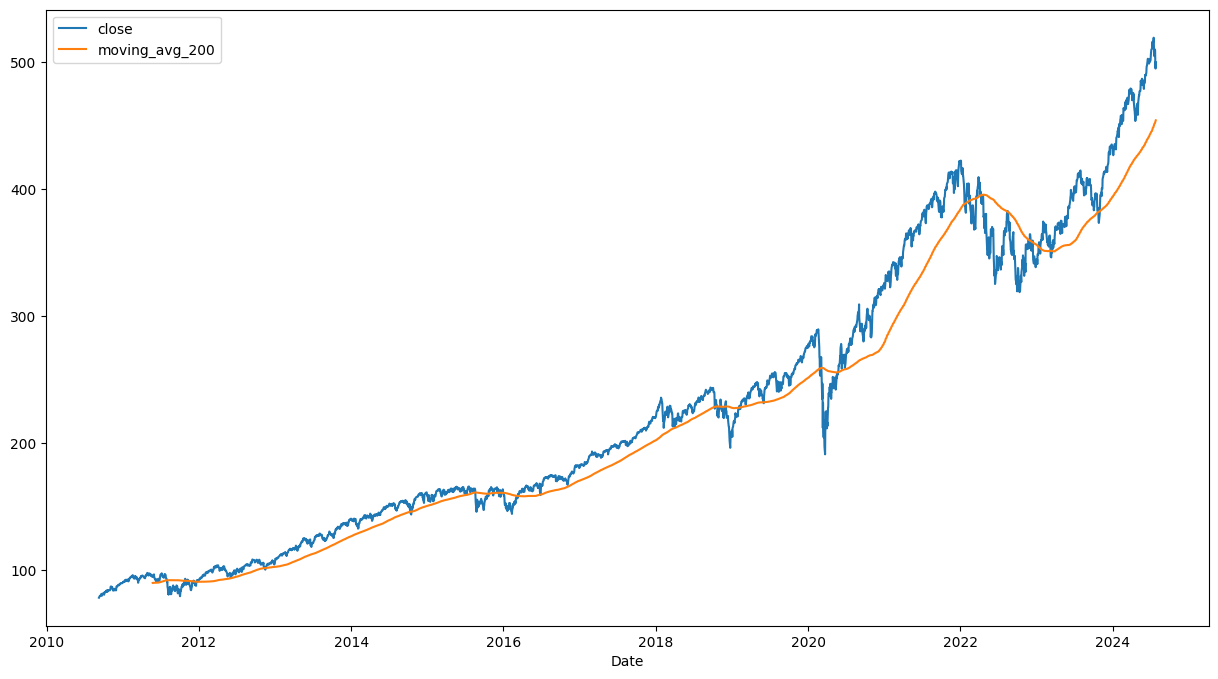

In [6]:
#
# Line graph columns over time
#
cols_to_plot = ['close', 'moving_avg_200']

df_plot = df[cols_to_plot]

# axs is a numpy.ndarray of matplotlib.axes._axes.Axes
fig, axs = plt.subplots(1)

# figure level settings
fig.set_size_inches((15, 8))

plt.xlabel('Date')

axs.plot(df_plot.index, 
         df_plot[cols_to_plot]
)
axs.legend(cols_to_plot)

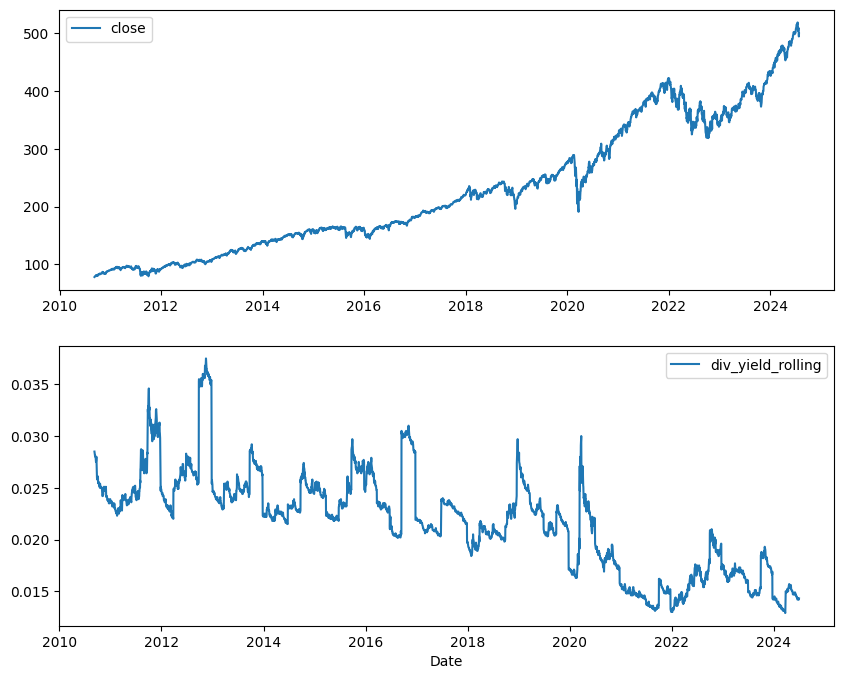

In [7]:
#
# plot multiple combos of columns, side by side for comparison
#

# specify number of subplots, allows to refer to them in an indexed manner
fig, axs = plt.subplots(2)

# set x label once as it's the same values/range
plt.xlabel('Date')

# figure level settings
fig.set_size_inches((10, 8))

# Using plt.plot() seems to keep previous info, It was values from both datasets on the same axis
# Using axs seems to treat each subplot separately, but also seems to look at the overall range 
#   of all the data sets in building it's Y axis

# Plot 1
plot_cols = ['close']
axs[0].plot(df.index, df[plot_cols]
)
axs[0].legend(plot_cols)

# Plot 2
plot_cols = ['div_yield_rolling']
axs[1].plot(df.index, df[plot_cols]
)
axs[1].legend(plot_cols)

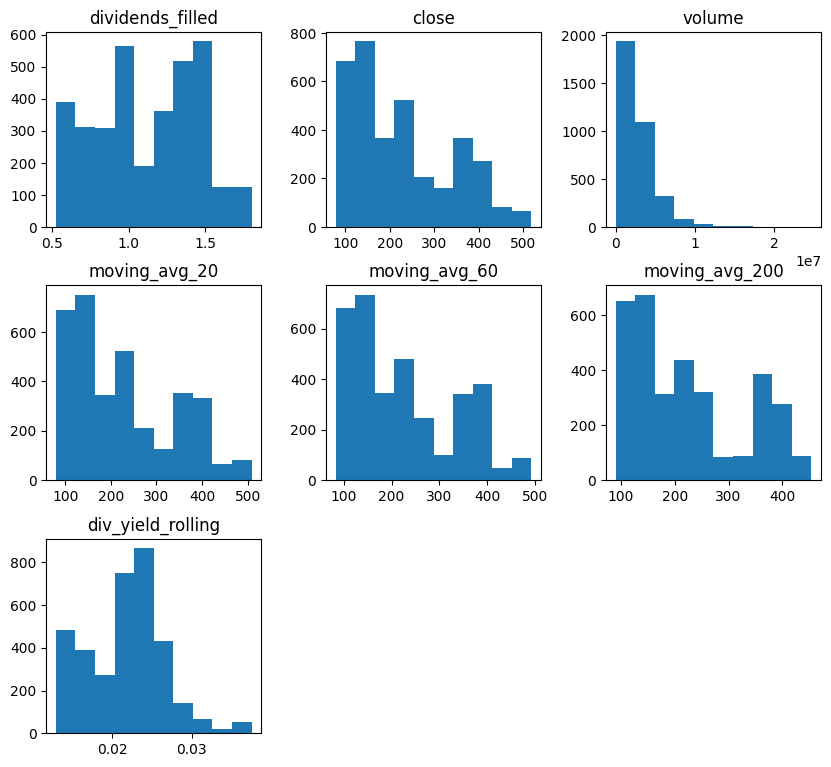

In [8]:
#
# Histograms
#

# ";" here keeps extraneous info from printing
df.hist(grid=False, layout=(20,3), figsize=(10,65));

<Axes: >

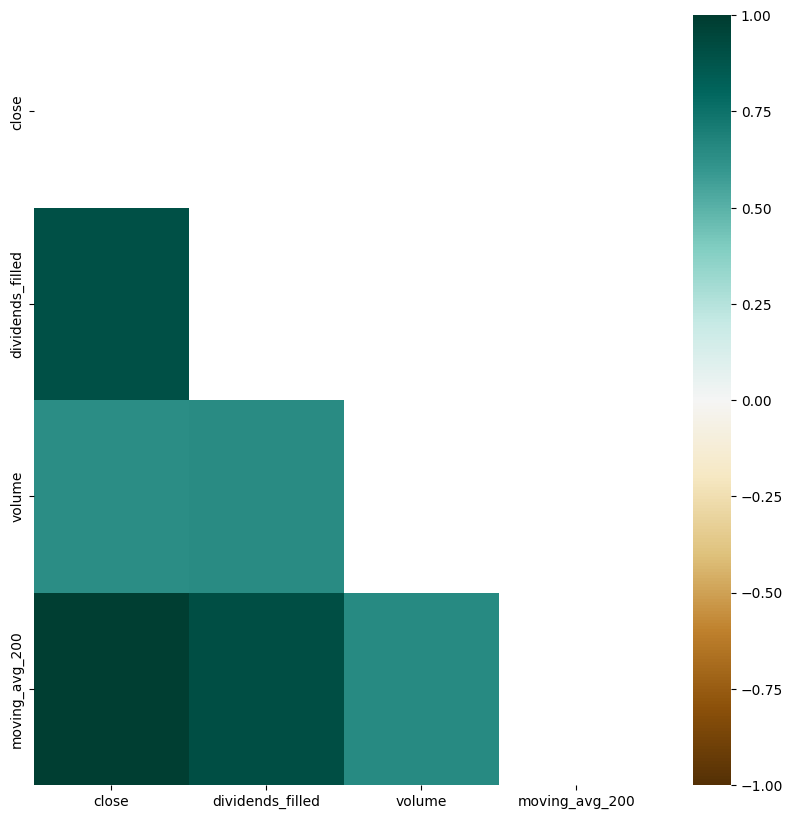

In [9]:
#
# Correlation matrix
#
cols_to_correlate = ['close', 'dividends_filled', 'volume', 'moving_avg_200']

corr = df[cols_to_correlate].corr()

# Generate a mask to avoid showing the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='BrBG', vmin=-1, vmax=1)